# KMRL Train Induction ML Model Pipeline

This notebook demonstrates the complete ML pipeline for train induction optimization:
1. **Data Ingestion** from PostgreSQL database
2. **Data Cleaning** and preprocessing
3. **Feature Engineering** from multiple data sources
4. **Model Training** using Random Forest and XGBoost
5. **Model Evaluation** and saving
6. **Prediction API** integration

## 1. Import Libraries and Setup

In [1]:
import sys
import os
import importlib

# Add the src directory to the path
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import our custom modules - force reload
if 'ml_model.pipeline' in sys.modules:
    importlib.reload(sys.modules['ml_model.feature_engineering'])
    importlib.reload(sys.modules['ml_model.data_preprocessing'])
    importlib.reload(sys.modules['ml_model.data_ingestion'])
    importlib.reload(sys.modules['ml_model.model_training'])
    importlib.reload(sys.modules['ml_model.pipeline'])

from ml_model.pipeline import MLPipeline
from ml_model.data_ingestion import DataIngestion
from ml_model.data_preprocessing import DataPreprocessor
from ml_model.feature_engineering import FeatureEngineer
from ml_model.model_training import ModelTrainer

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")
print(f"Current working directory: {os.getcwd()}")


✓ All libraries imported successfully!
Current working directory: /home/shrey/Documents/kochi2/SIH-HASTE/backend


In [4]:
# Initialize data ingestion
ingestion = DataIngestion()

# Fetch all data
print("Fetching data from PostgreSQL...")
raw_data = ingestion.fetch_all_data()

# Display data summary
print("\n" + "="*60)
print("DATA SUMMARY")
print("="*60)
for key, df in raw_data.items():
    print(f"{key:30s}: {len(df):6d} records")
    
# Preview trainsets data
print("\n" + "="*60)
print("Sample Trainset Data:")
print("="*60)
raw_data['trainsets'].head()

INFO:ml_model.data_ingestion:Database connection established
INFO:ml_model.data_ingestion:Starting comprehensive data fetch...
INFO:ml_model.data_ingestion:Starting comprehensive data fetch...
INFO:ml_model.data_ingestion:Fetched 75 trainsets
INFO:ml_model.data_ingestion:Fetched 75 trainsets
INFO:ml_model.data_ingestion:Fetched 293 fitness certificates
INFO:ml_model.data_ingestion:Fetched 180 job cards
INFO:ml_model.data_ingestion:Fetched 293 fitness certificates
INFO:ml_model.data_ingestion:Fetched 180 job cards
INFO:ml_model.data_ingestion:Fetched 35 branding contracts
INFO:ml_model.data_ingestion:Fetched 35 branding contracts
INFO:ml_model.data_ingestion:Fetched 1370 mileage tracking records
INFO:ml_model.data_ingestion:Fetched 1370 mileage tracking records
INFO:ml_model.data_ingestion:Fetched 391 cleaning slots
INFO:ml_model.data_ingestion:Fetched 36 induction decisions
INFO:ml_model.data_ingestion:Fetched 391 cleaning slots
INFO:ml_model.data_ingestion:Fetched 36 induction decisio

Fetching data from PostgreSQL...

DATA SUMMARY
trainsets                     :     75 records
fitness_certificates          :    293 records
job_cards                     :    180 records
branding_contracts            :     35 records
mileage_tracking              :   1370 records
cleaning_slots                :    391 records
induction_decisions           :     36 records
decision_history              :     22 records
emergency_logs                :     15 records
conflict_alerts               :     25 records

Sample Trainset Data:


,id,train_number,car_count,current_status,depot_id,stabling_position,total_mileage,last_maintenance_date,created_at,updated_at
0,26,T001,4,active,3,B02,48517.0,2025-09-22,2025-12-07 20:49:56.613,2025-12-07 20:49:56.613
1,27,T002,4,active,4,B03,56112.0,2025-10-15,2025-12-07 20:49:56.628,2025-12-07 20:49:56.628
2,28,T003,4,active,5,B04,82174.0,2025-11-23,2025-12-07 20:49:56.635,2025-12-07 20:49:56.635
3,29,T004,4,active,2,B05,38471.0,2025-10-22,2025-12-07 20:49:56.645,2025-12-07 20:49:56.645
4,30,T005,4,active,3,B06,92984.0,2025-11-20,2025-12-07 20:49:56.653,2025-12-07 20:49:56.653


In [5]:
# Run the complete pipeline
print("Starting ML Pipeline...")
print("="*60)

pipeline = MLPipeline()
summary = pipeline.run_full_pipeline(save_models=True)

print("\n" + "="*60)
print("PIPELINE COMPLETED!")
print("="*60)
print(f"Models trained: {summary['model_summary']['models_trained']}")
print(f"Total features: {summary['model_summary']['feature_count']}")

print("\nModel Metrics:")
for model, metrics in summary['model_summary']['metrics'].items():
    print(f"\n{model.upper()}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Make predictions for a specific train
print("\n" + "="*60)
print("TESTING PREDICTIONS")
print("="*60)
train_predictions = pipeline.predict_for_train(train_id=26)
print(f"\nPredictions for Train ID 26:")
for key, value in train_predictions.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

pipeline.cleanup()
print("\n✓ Models saved successfully to src/ml_model/models/")


INFO:ml_model.data_ingestion:Database connection established
INFO:ml_model.pipeline:============================================================
INFO:ml_model.pipeline:Starting Full ML Pipeline
INFO:ml_model.pipeline:============================================================
INFO:ml_model.pipeline:
[1/6] Data Ingestion...
INFO:ml_model.pipeline:============================================================
INFO:ml_model.pipeline:Starting Full ML Pipeline
INFO:ml_model.pipeline:============================================================
INFO:ml_model.pipeline:
[1/6] Data Ingestion...
INFO:ml_model.data_ingestion:Starting comprehensive data fetch...
INFO:ml_model.data_ingestion:Starting comprehensive data fetch...
INFO:ml_model.data_ingestion:Fetched 75 trainsets
INFO:ml_model.data_ingestion:Fetched 293 fitness certificates
INFO:ml_model.data_ingestion:Fetched 75 trainsets
INFO:ml_model.data_ingestion:Fetched 293 fitness certificates
INFO:ml_model.data_ingestion:Fetched 180 job cards
IN

Starting ML Pipeline...


INFO:ml_model.data_preprocessing:Cleaned trainsets: 75 records
INFO:ml_model.data_preprocessing:Cleaned fitness certificates: 293 records
INFO:ml_model.data_preprocessing:Cleaned fitness certificates: 293 records
INFO:ml_model.data_preprocessing:Cleaned job cards: 180 records
INFO:ml_model.data_preprocessing:Cleaned branding contracts: 35 records
INFO:ml_model.data_preprocessing:Cleaned job cards: 180 records
INFO:ml_model.data_preprocessing:Cleaned branding contracts: 35 records
INFO:ml_model.data_preprocessing:Cleaned mileage tracking: 1370 records
INFO:ml_model.data_preprocessing:Cleaned cleaning slots: 391 records
INFO:ml_model.data_preprocessing:Cleaned induction decisions: 36 records
INFO:ml_model.data_preprocessing:Cleaned decision history: 22 records
INFO:ml_model.data_preprocessing:Cleaned mileage tracking: 1370 records
INFO:ml_model.data_preprocessing:Cleaned cleaning slots: 391 records
INFO:ml_model.data_preprocessing:Cleaned induction decisions: 36 records
INFO:ml_model.dat


PIPELINE COMPLETED!
Models trained: ['induction', 'maintenance', 'punctuality']
Total features: 44

Model Metrics:

INDUCTION:
  accuracy: 0.7500
  precision: 0.5625
  recall: 0.7500
  f1: 0.6429

MAINTENANCE:
  accuracy: 0.7500
  precision: 0.5625
  recall: 0.7500
  f1: 0.6429

PUNCTUALITY:
  mse: 0.6251
  rmse: 0.7907
  r2: -1.0701
  mae: 0.6373

TESTING PREDICTIONS


INFO:ml_model.data_ingestion:Database connection closed
INFO:ml_model.pipeline:Pipeline cleanup completed
INFO:ml_model.pipeline:Pipeline cleanup completed



Predictions for Train ID 26:
  induction_success: {'prediction': 0, 'probability': 0.33592352688108434}
  optimal_for_induction: {'prediction': 0, 'probability': 0.3195616568395974}
  predicted_punctuality: 0.3178

✓ Models saved successfully to src/ml_model/models/


## 9. Alternative: Run Full Pipeline

Use the MLPipeline class to run everything in one go:

In [6]:
# Ensure required variables exist (cells below should define these; build if possible)
use_pipeline = False

if 'feature_df' not in globals():
    if 'engineer' in globals() and 'cleaned_data' in globals():
        print("feature_df not found — generating using existing 'engineer' and 'cleaned_data'...")
        feature_df = engineer.aggregate_trainset_features(cleaned_data)
        feature_df = engineer.create_target_variables(feature_df, cleaned_data['decision_history'])
        feature_cols = engineer.get_feature_columns(feature_df)
    else:
        # Try to construct missing pieces if possible
        if 'FeatureEngineer' in globals() and 'DataPreprocessor' in globals() and 'raw_data' in globals():
            print("feature_df not found — attempting to generate 'cleaned_data' and 'engineer' using available classes...")
            if 'cleaned_data' not in globals():
                preprocessor = DataPreprocessor()
                cleaned_data = preprocessor.preprocess_all_data(raw_data)
            if 'engineer' not in globals():
                engineer = FeatureEngineer()
            feature_df = engineer.aggregate_trainset_features(cleaned_data)
            feature_df = engineer.create_target_variables(feature_df, cleaned_data['decision_history'])
            feature_cols = engineer.get_feature_columns(feature_df)
        else:
            raise NameError("feature_df is not defined. Run the preprocessing and feature-engineering cells first (they create 'cleaned_data' and 'engineer').")

# If trainer missing, try to use pipeline if available
if 'trainer' not in globals():
    if 'pipeline' in globals():
        print("trainer not found — will use existing 'pipeline' to make predictions.")
        use_pipeline = True
    else:
        raise NameError("trainer is not defined. Run the model training cell to initialize and train models (creates 'trainer'), or ensure 'pipeline' exists.")

# Make predictions for first 10 trains
sample_trains = feature_df['id'].head(10).tolist()
predictions_df = pd.DataFrame()

for train_id in sample_trains:
    # Get train_number from feature_df if present, else try raw_data
    train_rows = feature_df[feature_df['id'] == train_id]
    train_number = None
    if not train_rows.empty and 'train_number' in train_rows.columns:
        train_number = train_rows['train_number'].values[0]
    elif 'raw_data' in globals() and 'trainsets' in raw_data:
        match = raw_data['trainsets'][raw_data['trainsets']['id'] == train_id]
        if not match.empty and 'train_number' in match.columns:
            train_number = match['train_number'].values[0]

    result = {'train_id': train_id, 'train_number': train_number}

    if use_pipeline:
        # pipeline.predict_for_train usually returns a summary dict; handle common keys robustly
        pred_dict = pipeline.predict_for_train(train_id)
        if isinstance(pred_dict, dict):
            ind = pred_dict.get('induction_success') or pred_dict.get('induction') or {}
            if isinstance(ind, dict):
                ip = ind.get('prediction') if ind.get('prediction') is not None else ind.get('pred')
                if ip is not None:
                    result['induction_pred'] = int(ip)
                prob = ind.get('probability') if ind.get('probability') is not None else ind.get('prob')
                if prob is not None:
                    result['induction_prob'] = float(prob)

            opt = pred_dict.get('optimal_for_induction') or pred_dict.get('maintenance') or {}
            if isinstance(opt, dict):
                op = opt.get('prediction') if opt.get('prediction') is not None else opt.get('pred')
                if op is not None:
                    result['optimal_pred'] = int(op)
                oprob = opt.get('probability') if opt.get('probability') is not None else opt.get('prob')
                if oprob is not None:
                    result['optimal_prob'] = float(oprob)

            punc = pred_dict.get('predicted_punctuality')
            if punc is not None:
                # punctuality may be a scalar
                try:
                    result['punctuality_pred'] = float(punc)
                except:
                    pass
    else:
        # Use trainer object predictions (original logic, made robust)
        # Induction prediction
        if hasattr(trainer, 'models') and 'induction' in trainer.models:
            pred_out = trainer.predict(train_rows, 'induction')
            # trainer.predict may return (pred, prob) or pred directly
            if isinstance(pred_out, tuple) and len(pred_out) == 2:
                pred, prob = pred_out
            else:
                pred = pred_out
                prob = None

            if isinstance(pred, (list, np.ndarray)):
                result['induction_pred'] = int(pred[0])
            else:
                try:
                    result['induction_pred'] = int(pred)
                except:
                    pass

            if prob is not None:
                try:
                    result['induction_prob'] = float(prob[0][1]) if getattr(prob, "ndim", 1) > 1 and prob.shape[1] > 1 else float(prob[0][0])
                except:
                    # fallback if prob is 1d
                    try:
                        result['induction_prob'] = float(prob[0])
                    except:
                        pass

        # Maintenance prediction
        if hasattr(trainer, 'models') and 'maintenance' in trainer.models:
            pred_out = trainer.predict(train_rows, 'maintenance')
            if isinstance(pred_out, tuple) and len(pred_out) == 2:
                pred, prob = pred_out
            else:
                pred = pred_out
                prob = None

            if isinstance(pred, (list, np.ndarray)):
                result['optimal_pred'] = int(pred[0])
            else:
                try:
                    result['optimal_pred'] = int(pred)
                except:
                    pass

            if prob is not None:
                try:
                    result['optimal_prob'] = float(prob[0][1]) if getattr(prob, "ndim", 1) > 1 and prob.shape[1] > 1 else float(prob[0][0])
                except:
                    try:
                        result['optimal_prob'] = float(prob[0])
                    except:
                        pass

        # Punctuality prediction
        if hasattr(trainer, 'models') and 'punctuality' in trainer.models:
            pred_out = trainer.predict(train_rows, 'punctuality')
            if isinstance(pred_out, tuple):
                pred = pred_out[0]
            else:
                pred = pred_out
            try:
                result['punctuality_pred'] = float(pred[0])
            except:
                try:
                    result['punctuality_pred'] = float(pred)
                except:
                    pass

    predictions_df = pd.concat([predictions_df, pd.DataFrame([result])], ignore_index=True)

print("Predictions for Sample Trains:")
predictions_df

INFO:ml_model.data_preprocessing:Starting data preprocessing...


feature_df not found — attempting to generate 'cleaned_data' and 'engineer' using available classes...


INFO:ml_model.data_preprocessing:Cleaned trainsets: 75 records
INFO:ml_model.data_preprocessing:Cleaned fitness certificates: 293 records
INFO:ml_model.data_preprocessing:Cleaned fitness certificates: 293 records
INFO:ml_model.data_preprocessing:Cleaned job cards: 180 records
INFO:ml_model.data_preprocessing:Cleaned job cards: 180 records
INFO:ml_model.data_preprocessing:Cleaned branding contracts: 35 records
INFO:ml_model.data_preprocessing:Cleaned branding contracts: 35 records
INFO:ml_model.data_preprocessing:Cleaned mileage tracking: 1370 records
INFO:ml_model.data_preprocessing:Cleaned mileage tracking: 1370 records
INFO:ml_model.data_preprocessing:Cleaned cleaning slots: 391 records
INFO:ml_model.data_preprocessing:Cleaned induction decisions: 36 records
INFO:ml_model.data_preprocessing:Cleaned cleaning slots: 391 records
INFO:ml_model.data_preprocessing:Cleaned induction decisions: 36 records
INFO:ml_model.data_preprocessing:Cleaned decision history: 22 records
INFO:ml_model.dat

trainer not found — will use existing 'pipeline' to make predictions.
Predictions for Sample Trains:
Predictions for Sample Trains:


,train_id,train_number,induction_pred,induction_prob,optimal_pred,optimal_prob,punctuality_pred
0,26,T001,0,0.335924,0,0.319562,0.317808
1,27,T002,0,0.499564,0,0.286848,1.691236
2,28,T003,0,0.260570,0,0.197948,0.451718
3,29,T004,0,0.324258,0,0.155530,1.946635
4,30,T005,1,0.577829,1,0.670266,-0.546276
5,31,T006,0,0.267780,0,0.283592,0.705969
6,32,T007,0,0.305278,0,0.255369,-0.490582
7,33,T008,0,0.301405,0,0.204272,-0.065368
8,34,T009,0,0.387638,0,0.424203,-0.092062
9,35,T010,0,0.325584,0,0.290911,0.192379


## 8. Make Predictions

Let's test our trained models by making predictions for some trains.

In [11]:
# Save all trained models
print("Saving models...")
trainer.save_models()
print("✓ All models saved successfully!")

# Display model summary
summary = trainer.get_model_summary()
print("\n" + "="*60)
print("MODEL SUMMARY")
print("="*60)
print(f"Models Trained: {summary['models_trained']}")
print(f"Total Features: {summary['feature_count']}")
print("\nModel Metrics:")
for model, metrics in summary['metrics'].items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

INFO:ml_model.model_training:Saving models...


Saving models...


INFO:ml_model.model_training:Induction model saved to /home/shrey/Documents/kochi2/SIH-HASTE/backend/src/ml_model/models/induction_model.joblib
INFO:ml_model.model_training:Maintenance model saved to /home/shrey/Documents/kochi2/SIH-HASTE/backend/src/ml_model/models/maintenance_model.joblib
INFO:ml_model.model_training:Maintenance model saved to /home/shrey/Documents/kochi2/SIH-HASTE/backend/src/ml_model/models/maintenance_model.joblib
INFO:ml_model.model_training:Punctuality model saved to /home/shrey/Documents/kochi2/SIH-HASTE/backend/src/ml_model/models/optimization_model.joblib
INFO:ml_model.model_training:Punctuality model saved to /home/shrey/Documents/kochi2/SIH-HASTE/backend/src/ml_model/models/optimization_model.joblib
INFO:ml_model.model_training:Scaler saved to /home/shrey/Documents/kochi2/SIH-HASTE/backend/src/ml_model/models/scaler.joblib
INFO:ml_model.model_training:Feature names saved to /home/shrey/Documents/kochi2/SIH-HASTE/backend/src/ml_model/models/feature_names.job

✓ All models saved successfully!

MODEL SUMMARY
Models Trained: ['induction', 'maintenance', 'punctuality']
Total Features: 44

Model Metrics:

induction:
  accuracy: 0.7500
  precision: 0.5625
  recall: 0.7500
  f1: 0.6429

maintenance:
  accuracy: 0.7500
  precision: 0.5625
  recall: 0.7500
  f1: 0.6429

punctuality:
  mse: 0.6251
  rmse: 0.7907
  r2: -1.0701
  mae: 0.6373


## 7. Save Models

In [10]:
# Initialize model trainer
trainer = ModelTrainer()
trainer.feature_names = feature_cols

print("="*60)
print("TRAINING MODELS")
print("="*60)

# Train Induction Success Model
print("\n[1/3] Training Induction Success Model...")
try:
    X_train, X_test, y_train, y_test = trainer.prepare_data(feature_df, feature_cols, 'induction_success')
    if X_train is not None:
        metrics_induction = trainer.train_induction_model(X_train, y_train, X_test, y_test)
        print(f"✓ Induction Model - Accuracy: {metrics_induction['accuracy']:.3f}, F1: {metrics_induction['f1']:.3f}")
except Exception as e:
    print(f"✗ Error: {e}")

# Train Maintenance Optimization Model
print("\n[2/3] Training Maintenance Optimization Model...")
try:
    X_train, X_test, y_train, y_test = trainer.prepare_data(feature_df, feature_cols, 'optimal_for_induction')
    if X_train is not None:
        metrics_maintenance = trainer.train_maintenance_model(X_train, y_train, X_test, y_test)
        print(f"✓ Maintenance Model - Accuracy: {metrics_maintenance['accuracy']:.3f}, F1: {metrics_maintenance['f1']:.3f}")
except Exception as e:
    print(f"✗ Error: {e}")

# Train Punctuality Prediction Model
print("\n[3/3] Training Punctuality Prediction Model...")
try:
    X_train, X_test, y_train, y_test = trainer.prepare_data(feature_df, feature_cols, 'predicted_punctuality')
    if X_train is not None:
        metrics_punctuality = trainer.train_punctuality_model(X_train, y_train, X_test, y_test)
        print(f"✓ Punctuality Model - RMSE: {metrics_punctuality['rmse']:.3f}, R²: {metrics_punctuality['r2']:.3f}")
except Exception as e:
    print(f"✗ Error: {e}")

print("\n" + "="*60)
print("MODEL TRAINING COMPLETED!")
print("="*60)

INFO:ml_model.model_training:Preparing data for target: induction_success
INFO:ml_model.model_training:Train set size: 61, Test set size: 16
INFO:ml_model.model_training:Training Induction Success Model...
INFO:ml_model.model_training:Scaling features...
INFO:ml_model.model_training:Train set size: 61, Test set size: 16
INFO:ml_model.model_training:Training Induction Success Model...
INFO:ml_model.model_training:Scaling features...


TRAINING MODELS

[1/3] Training Induction Success Model...


INFO:ml_model.model_training:Best Induction Model: RandomForest
INFO:ml_model.model_training:Metrics: {'accuracy': 0.75, 'precision': 0.5625, 'recall': 0.75, 'f1': 0.6428571428571428}
INFO:ml_model.model_training:Metrics: {'accuracy': 0.75, 'precision': 0.5625, 'recall': 0.75, 'f1': 0.6428571428571428}
INFO:ml_model.model_training:Top 10 features:
                       feature  importance
1       days_since_maintenance    0.086089
22          wear_indicator_avg    0.075472
8         fitness_health_score    0.070242
20           avg_daily_mileage    0.061663
27     upcoming_cleaning_slots    0.059717
21  current_cumulative_mileage    0.056527
12             total_job_cards    0.056333
24   mileage_until_maintenance    0.050618
6        min_days_until_expiry    0.045429
11          avg_priority_score    0.039922
INFO:ml_model.model_training:Preparing data for target: optimal_for_induction
INFO:ml_model.model_training:Top 10 features:
                       feature  importance
1       da

✓ Induction Model - Accuracy: 0.750, F1: 0.643

[2/3] Training Maintenance Optimization Model...


INFO:ml_model.model_training:Scaling features...
INFO:ml_model.model_training:Maintenance Model Metrics: {'accuracy': 0.75, 'precision': 0.5625, 'recall': 0.75, 'f1': 0.6428571428571428}
INFO:ml_model.model_training:Preparing data for target: predicted_punctuality
INFO:ml_model.model_training:Train set size: 61, Test set size: 16
INFO:ml_model.model_training:Training Punctuality Prediction Model...
INFO:ml_model.model_training:Scaling features...
INFO:ml_model.model_training:Maintenance Model Metrics: {'accuracy': 0.75, 'precision': 0.5625, 'recall': 0.75, 'f1': 0.6428571428571428}
INFO:ml_model.model_training:Preparing data for target: predicted_punctuality
INFO:ml_model.model_training:Train set size: 61, Test set size: 16
INFO:ml_model.model_training:Training Punctuality Prediction Model...
INFO:ml_model.model_training:Scaling features...


✓ Maintenance Model - Accuracy: 0.750, F1: 0.643

[3/3] Training Punctuality Prediction Model...


INFO:ml_model.model_training:Punctuality Model Metrics: {'mse': 0.6251420801736927, 'rmse': np.float64(0.7906592693276242), 'r2': -1.070073826948374, 'mae': np.float64(0.6372646233016016)}


✓ Punctuality Model - RMSE: 0.791, R²: -1.070

MODEL TRAINING COMPLETED!


## 6. Model Training

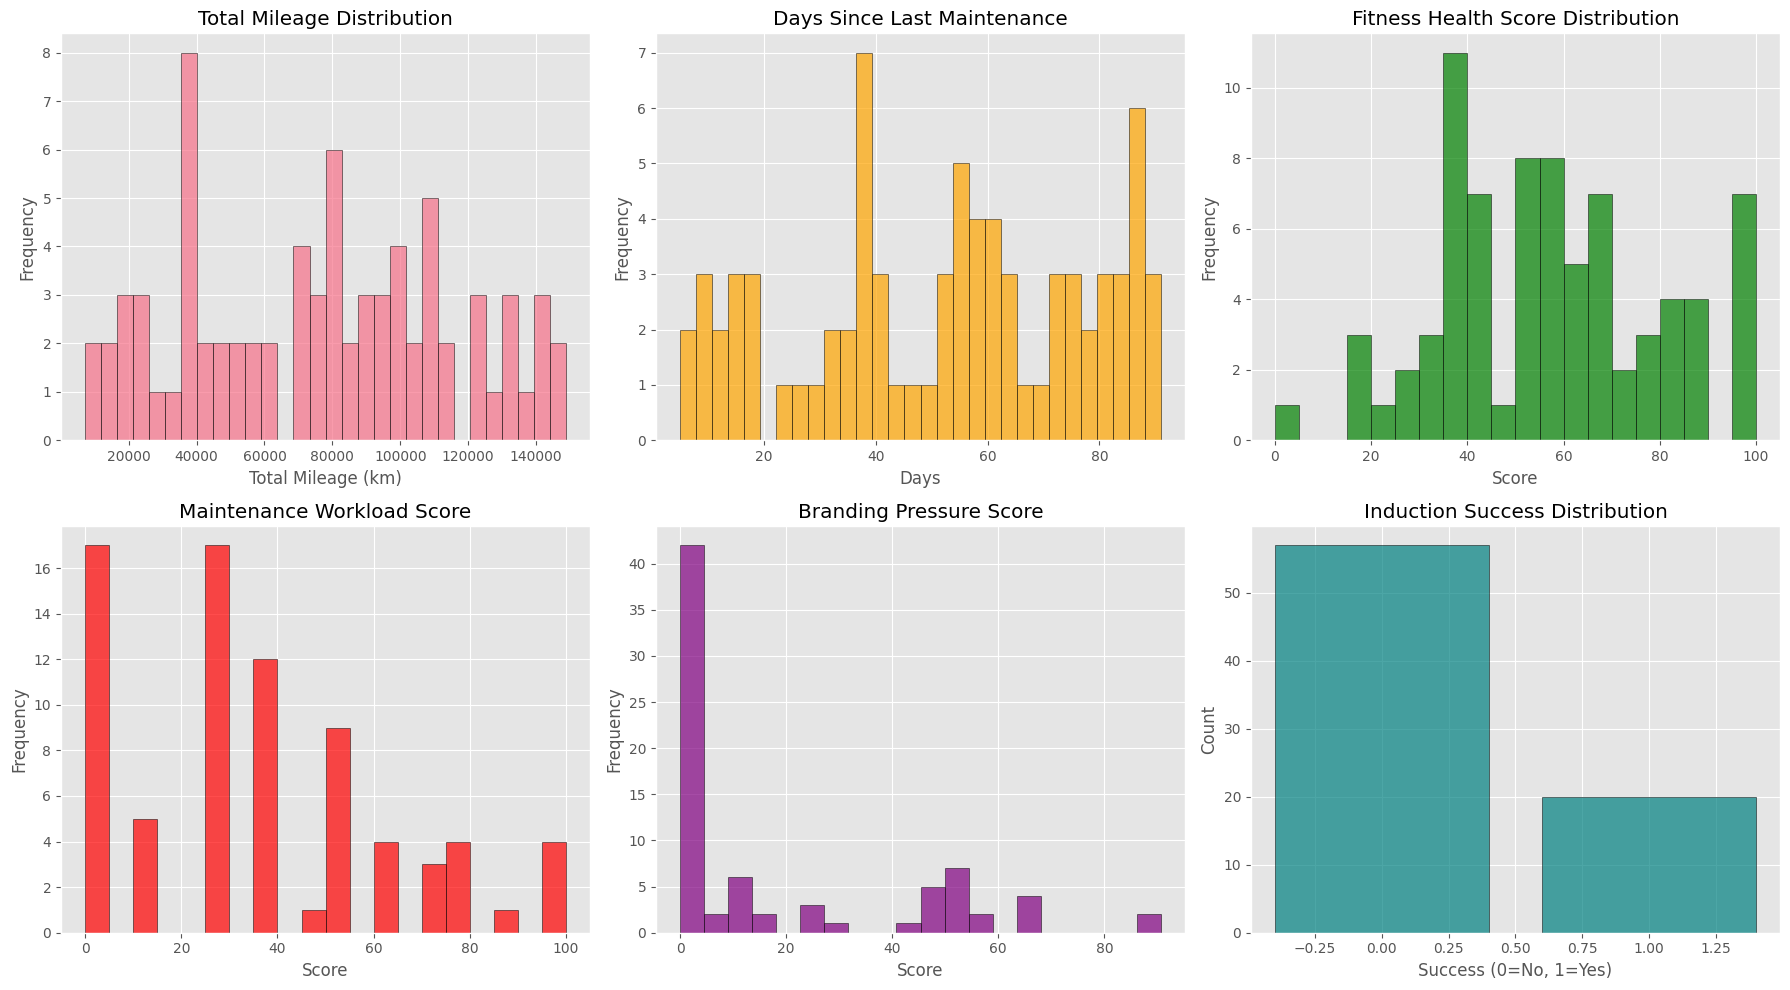


Feature Statistics:


,total_mileage,days_since_maintenance,fitness_health_score,maintenance_workload_score
count,77.000000,77.000000,77.000000,77.000000
mean,76678.545455,52.194805,56.876623,34.025974
std,39112.012124,25.285756,22.904668,27.874707
min,7139.000000,5.000000,0.000000,0.000000
25%,40012.000000,36.000000,38.333333,10.000000
50%,79768.000000,55.000000,57.000000,25.000000
75%,106571.000000,74.000000,71.000000,50.000000
max,148838.000000,91.000000,100.000000,100.000000


In [9]:
# Visualize key features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Total Mileage Distribution
axes[0, 0].hist(feature_df['total_mileage'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Total Mileage Distribution')
axes[0, 0].set_xlabel('Total Mileage (km)')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Days Since Maintenance
axes[0, 1].hist(feature_df['days_since_maintenance'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Days Since Last Maintenance')
axes[0, 1].set_xlabel('Days')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Fitness Health Score
if 'fitness_health_score' in feature_df.columns:
    axes[0, 2].hist(feature_df['fitness_health_score'], bins=20, edgecolor='black', alpha=0.7, color='green')
    axes[0, 2].set_title('Fitness Health Score Distribution')
    axes[0, 2].set_xlabel('Score')
    axes[0, 2].set_ylabel('Frequency')

# Plot 4: Maintenance Workload Score
if 'maintenance_workload_score' in feature_df.columns:
    axes[1, 0].hist(feature_df['maintenance_workload_score'], bins=20, edgecolor='black', alpha=0.7, color='red')
    axes[1, 0].set_title('Maintenance Workload Score')
    axes[1, 0].set_xlabel('Score')
    axes[1, 0].set_ylabel('Frequency')

# Plot 5: Branding Pressure Score
if 'branding_pressure_score' in feature_df.columns:
    axes[1, 1].hist(feature_df['branding_pressure_score'], bins=20, edgecolor='black', alpha=0.7, color='purple')
    axes[1, 1].set_title('Branding Pressure Score')
    axes[1, 1].set_xlabel('Score')
    axes[1, 1].set_ylabel('Frequency')

# Plot 6: Target Variable Distribution
if 'induction_success' in feature_df.columns:
    target_counts = feature_df['induction_success'].value_counts()
    axes[1, 2].bar(target_counts.index, target_counts.values, edgecolor='black', alpha=0.7, color='teal')
    axes[1, 2].set_title('Induction Success Distribution')
    axes[1, 2].set_xlabel('Success (0=No, 1=Yes)')
    axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Feature Statistics:")
print("="*60)
feature_df[['total_mileage', 'days_since_maintenance', 'fitness_health_score', 
            'maintenance_workload_score']].describe()

## 5. Exploratory Data Analysis

In [7]:
# Initialize feature engineer
engineer = FeatureEngineer()

# Aggregate features
print("Engineering features...")
feature_df = engineer.aggregate_trainset_features(cleaned_data)

# Create target variables
feature_df = engineer.create_target_variables(feature_df, cleaned_data['decision_history'])

# Get feature columns
feature_cols = engineer.get_feature_columns(feature_df)

print(f"\nTotal features created: {len(feature_cols)}")
print(f"Feature dataframe shape: {feature_df.shape}")
print(f"\nFirst 10 features: {feature_cols[:10]}")

# Display sample data
feature_df.head()

INFO:ml_model.feature_engineering:Starting feature aggregation...


Engineering features...


INFO:ml_model.feature_engineering:Feature aggregation completed. Shape: (75, 47)
INFO:ml_model.feature_engineering:Creating target variables...
INFO:ml_model.feature_engineering:Creating target variables...
INFO:ml_model.feature_engineering:Target variables created. Shape: (77, 51)
INFO:ml_model.feature_engineering:Target variables created. Shape: (77, 51)
INFO:ml_model.feature_engineering:Total features: 44
INFO:ml_model.feature_engineering:Total features: 44



Total features created: 44
Feature dataframe shape: (77, 51)

First 10 features: ['total_mileage', 'days_since_maintenance', 'depot_id', 'valid_certificates', 'expired_certificates', 'expiring_soon_certificates', 'min_days_until_expiry', 'total_certificates', 'fitness_health_score', 'open_job_cards']


,id,train_number,current_status,total_mileage,days_since_maintenance,depot_id,valid_certificates,expired_certificates,expiring_soon_certificates,min_days_until_expiry,total_certificates,fitness_health_score,open_job_cards,overdue_job_cards,avg_priority_score,total_job_cards,critical_job_cards,maintenance_workload_score,has_active_branding,urgent_branding_contracts,branding_priority_score,branding_completion_pct,branding_pressure_score,avg_daily_mileage,current_cumulative_mileage,wear_indicator_avg,needs_maintenance_soon,mileage_until_maintenance,recent_mileage_trend,days_since_last_cleaning,upcoming_cleaning_slots,completed_cleanings_30d,needs_cleaning,total_emergencies_30d,critical_emergencies_30d,days_since_last_emergency,emergency_risk_score,active_conflicts,avg_resolution_hours,resolved_conflicts_30d,conflict_severity_score,status_active,status_cleaning,status_inspection,status_maintenance,status_offline,status_standby,train_id,induction_success,predicted_punctuality,optimal_for_induction
0,26,T001,active,48517.0,77,3,5,0,1,6,5,85.000000,1,0,2.5,2,1.0,35.0,0.0,0.0,24.0,75.663265,12.101020,504.554444,47922.16,0.019444,1,2077.84,504.554444,999.0,4,0.0,1,0.0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,NaN,0.0,0.00,0
1,27,T002,active,56112.0,54,4,3,1,0,-87,5,57.000000,0,0,3.0,1,1.0,25.0,0.0,0.0,47.0,91.134328,12.059701,428.549000,47927.55,0.014000,1,2072.45,428.549000,999.0,6,0.0,1,0.0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,27.0,1.0,2.93,0
2,28,T003,active,82174.0,15,5,4,1,1,-42,5,56.000000,2,0,3.0,3,2.0,70.0,0.0,0.0,72.0,67.699531,24.090141,446.384737,76444.92,0.087895,1,-26121.14,446.384737,999.0,4,0.0,1,0.0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,NaN,0.0,0.00,0
3,29,T004,active,38471.0,47,2,2,0,0,56,3,76.666667,0,0,3.0,3,3.0,75.0,1.0,0.0,85.0,68.381579,46.485526,453.236500,34508.61,0.000000,0,15491.39,453.236500,999.0,4,0.0,1,0.0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,29.0,0.0,3.38,0
4,30,T005,active,92984.0,18,3,2,2,0,-53,5,43.000000,0,0,1.0,1,0.0,0.0,0.0,0.0,0.0,66.522976,10.043107,487.642778,87468.57,0.042778,1,-37468.57,487.642778,999.0,6,0.0,1,1.0,0.0,4.0,25.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,30.0,1.0,-1.91,1


## 4. Feature Engineering

In [8]:
# Initialize preprocessor
preprocessor = DataPreprocessor()

# Clean all data
print("Preprocessing data...")
cleaned_data = preprocessor.preprocess_all_data(raw_data)

# Check cleaned data
print("\nCleaned Trainsets Data:")
cleaned_data['trainsets'][['train_number', 'current_status', 'total_mileage', 'days_since_maintenance']].head(10)

INFO:ml_model.data_preprocessing:Starting data preprocessing...
INFO:ml_model.data_preprocessing:Cleaned trainsets: 75 records
INFO:ml_model.data_preprocessing:Cleaned trainsets: 75 records


Preprocessing data...


INFO:ml_model.data_preprocessing:Cleaned fitness certificates: 293 records
INFO:ml_model.data_preprocessing:Cleaned job cards: 180 records
INFO:ml_model.data_preprocessing:Cleaned job cards: 180 records
INFO:ml_model.data_preprocessing:Cleaned branding contracts: 35 records
INFO:ml_model.data_preprocessing:Cleaned branding contracts: 35 records
INFO:ml_model.data_preprocessing:Cleaned mileage tracking: 1370 records
INFO:ml_model.data_preprocessing:Cleaned mileage tracking: 1370 records
INFO:ml_model.data_preprocessing:Cleaned cleaning slots: 391 records
INFO:ml_model.data_preprocessing:Cleaned induction decisions: 36 records
INFO:ml_model.data_preprocessing:Cleaned cleaning slots: 391 records
INFO:ml_model.data_preprocessing:Cleaned induction decisions: 36 records
INFO:ml_model.data_preprocessing:Cleaned decision history: 22 records
INFO:ml_model.data_preprocessing:Cleaned emergency logs: 15 records
INFO:ml_model.data_preprocessing:Cleaned decision history: 22 records
INFO:ml_model.dat


Cleaned Trainsets Data:


,train_number,current_status,total_mileage,days_since_maintenance
0,T001,active,48517.0,77
1,T002,active,56112.0,54
2,T003,active,82174.0,15
3,T004,active,38471.0,47
4,T005,active,92984.0,18
5,T006,active,54697.0,89
6,T007,active,20037.0,51
7,T008,active,127702.0,23
8,T009,active,90529.0,55
9,T010,active,112551.0,55


## 3. Data Preprocessing and Cleaning

## 2. Data Ingestion - Fetch from PostgreSQL